In [249]:
from skimage import io, filters, img_as_ubyte
from skimage.color import rgb2gray

from skimage import feature, morphology
import numpy as np
import matplotlib.pyplot as plt

from skimage import color
from skimage.transform import hough_circle, hough_circle_peaks, hough_ellipse
from skimage.draw import circle_perimeter, ellipse_perimeter
import cv2

from scipy.spatial import distance

In [250]:
img = io.imread("imgs/WAC_GL000.tif", key=0, as_gray=True)

<ipython-input-251-18b5f618cd76>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = rgb2gray(cropped_image)


<Figure size 432x288 with 0 Axes>

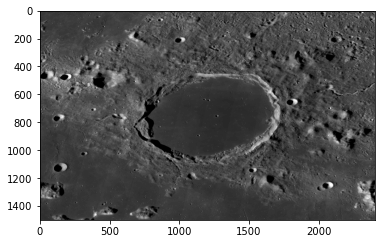

<Figure size 432x288 with 0 Axes>

In [251]:
cropped_image = img[3000:4500, 14400:16800]

image = rgb2gray(cropped_image)

plt.imshow(image, cmap="gray")
plt.figure()

<Figure size 432x288 with 0 Axes>

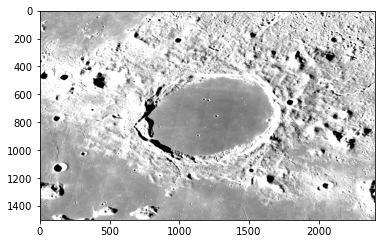

<Figure size 432x288 with 0 Axes>

In [252]:
alpha = 2 # Contrast control (1.0-3.0)
beta = 75 # Brightness control (0-100)
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
plt.imshow(adjusted, cmap="gray")
plt.figure()

<Figure size 432x288 with 0 Axes>

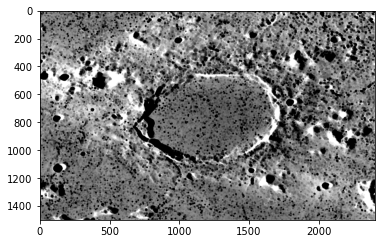

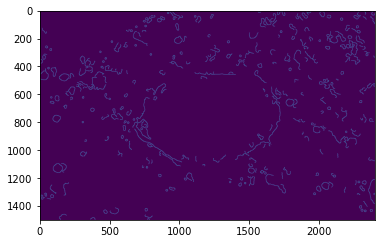

<Figure size 432x288 with 0 Axes>

In [253]:
prepared = morphology.erosion(adjusted, selem=morphology.selem.disk(6))
plt.imshow(prepared, cmap="gray")
plt.figure()

canny_edge = feature.canny(prepared, sigma=3.5, low_threshold=50, high_threshold=100)

plt.imshow(canny_edge)
plt.figure()

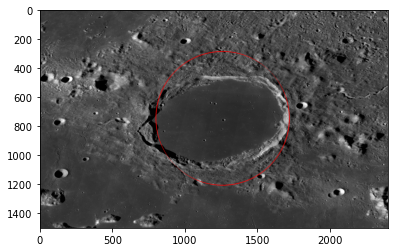

In [254]:
hough_radii = np.arange(450, 650)
hough_res = hough_circle(canny_edge, hough_radii)

accums1, cx1, cy1, radii1 = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y1, center_x1, radius1 in zip(cy1, cx1, radii1):
    circy1, circx1 = circle_perimeter(center_y1, center_x1, radius1,
                                    shape=image.shape)
    image[circy1, circx1] = (255, 0, 0)
    image[circy1+1, circx1+1] = (255, 0, 0)
    image[circy1+2, circx1+2] = (255, 0, 0)
    image[circy1-1, circx1-1] = (255, 0, 0)
    image[circy1-2, circx1-2] = (255, 0, 0)

ax.imshow(image, cmap="gray")
plt.show()

In [255]:
print(radius1)
print(center_x1)
print(center_y1)

x_start1 = center_x1 - radius1
x_end1 = center_x1 + radius1
y_start1 = center_y1 - radius1
y_end1 = center_y1 + radius1

print()
print(x_start1)
print(x_end1)
print(y_start1)
print(y_end1)

460
1259
745

799
1719
285
1205


<ipython-input-268-0e00a05b7d6a>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image2 = rgb2gray(cropped_image2)


<Figure size 432x288 with 0 Axes>

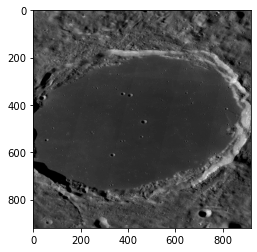

<Figure size 432x288 with 0 Axes>

In [268]:
cropped_image2 = cropped_image[y_start1:y_end1, x_start1:x_end1]
image2 = rgb2gray(cropped_image2)

plt.imshow(image2, cmap="gray")
plt.figure()

<Figure size 432x288 with 0 Axes>

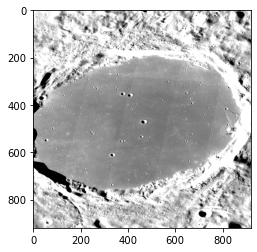

<Figure size 432x288 with 0 Axes>

In [269]:
alpha = 2 # Contrast control (1.0-3.0)
beta = 75 # Brightness control (0-100)
adjusted2 = cv2.convertScaleAbs(image2, alpha=alpha, beta=beta)
plt.imshow(adjusted2, cmap="gray")
plt.figure()

<Figure size 432x288 with 0 Axes>

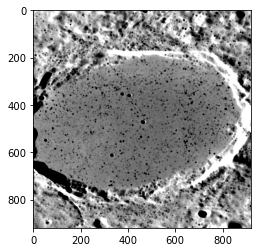

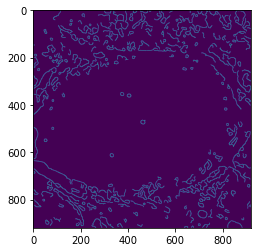

<Figure size 432x288 with 0 Axes>

In [270]:
prepared2 = morphology.erosion(adjusted2, selem=morphology.selem.disk(3))
plt.imshow(prepared2, cmap="gray")
plt.figure()

canny_edge2 = feature.canny(prepared2, sigma=3, low_threshold=40, high_threshold=80)

plt.imshow(canny_edge2)
plt.figure()

[385]


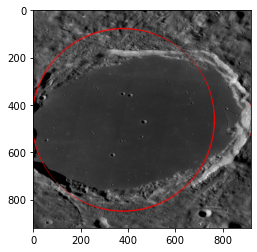

In [271]:
hough_radii2 = np.arange(300, 500)
hough_res2 = hough_circle(canny_edge2, hough_radii2)

# Select the most prominent 3 circles
accums2, cx2, cy2, radii2 = hough_circle_peaks(hough_res2, hough_radii2,
                                           total_num_peaks=1)

print(radii2)
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image2 = color.gray2rgb(image2)
for center_y2, center_x2, radius2 in zip(cy2, cx2, radii2):
    circy2, circx2 = circle_perimeter(center_y2, center_x2, radius2, shape=image2.shape)
    image2[circy2, circx2] = (255, 0, 0)
    image2[circy2+1, circx2+1] = (255, 0, 0)
    image2[circy2+2, circx2+2] = (255, 0, 0)
    image2[circy2-1, circx2-1] = (255, 0, 0)
    image2[circy2-2, circx2-2] = (255, 0, 0)

ax.imshow(image2, cmap="gray")
plt.show()


<ipython-input-288-b03fef71fb48>:14: FutureWarning: Pass-through of possibly RGB images in gray2rgb is deprecated. In version 0.19, input arrays will always be considered grayscale, even if the last dimension has length 3 or 4. To prevent this warning and ensure compatibility with future versions, detect RGB images outside of this function.
  image2 = color.gray2rgb(image2)


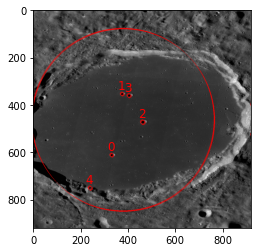

In [288]:
hough_radii3 = np.arange(7, 40)
hough_res3 = hough_circle(canny_edge2, hough_radii3)

# Select the most prominent 3 circles
accums3, cx3, cy3, radii3 = hough_circle_peaks(hough_res3, hough_radii3,
                                           total_num_peaks=30)

craters_x = []
craters_y = []
craters_radius = []

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image2 = color.gray2rgb(image2)
for center_y3, center_x3, radius3 in zip(cy3, cx3, radii3):

    a = (center_x2, center_y2)
    b = (center_x3, center_y3)
    dist = distance.euclidean(a, b)
    #print(dst)

    if dist < radii2:
        if len(craters_x) < 5:
            if center_y3 not in craters_y and center_x3 not in craters_x:
                circy3, circx3 = circle_perimeter(center_y3, center_x3, radius3, shape=image2.shape)
                label = "{}".format(len(craters_x))

                plt.text(center_x3-20, center_y3-20, label, fontsize=12, color="red")
                image2[circy3, circx3] = (255, 0, 0)
                image2[circy3+1, circx3+1] = (255, 0, 0)
                image2[circy3+2, circx3+2] = (255, 0, 0)
                image2[circy3-1, circx3-1] = (255, 0, 0)
                image2[circy3-2, circx3-2] = (255, 0, 0)
                craters_x.append(center_x3)
                craters_y.append(center_y3)
                craters_radius.append(radius3)

ax.imshow(image2, cmap="gray")
plt.show()

In [282]:
import itertools
print(craters_x)
print(craters_y)
print(craters_radius)
print()

for i in range(0,len(craters_x)):
    print("Index [{}] -> Crater x: {}, Crater y: {}, Crater radius: {}.".format(i,craters_x[i],craters_y[i],craters_radius[i]))

#for (a, b, c) in itertools.zip_longest(craters_x, craters_y, craters_radius):
#    print("Crater x coordinate: ", a)
#    print("Crater y coordinate: ", b)
#    print("Crater radius: ", c)
#    print()

[332, 376, 463, 405, 241]
[612, 354, 473, 361, 751]
[7, 7, 9, 8, 8]

Index [0] -> Crater x: 332, Crater y: 612, Crater radius: 7.
Index [1] -> Crater x: 376, Crater y: 354, Crater radius: 7.
Index [2] -> Crater x: 463, Crater y: 473, Crater radius: 9.
Index [3] -> Crater x: 405, Crater y: 361, Crater radius: 8.
Index [4] -> Crater x: 241, Crater y: 751, Crater radius: 8.
